# __Customer Segmentation: Clustering with SOM and KMeans__

---

__Author:__ Soria Martínez Jesús Armando

🔗 [LinkedIn](http://www.linkedin.com/in/jesus-armando-soria-martinez-a9b786366)

---

En este proyecto se implementa una estrategia de segmentación de clientes utilizando Self-Organizing Maps (SOM) y K-Means, aplicada a un dataset de clientes de retail. El SOM se utiliza para reducir la dimensionalidad de los datos preservando su topología, mientras que K-Means permite definir los clusters finales.

El análisis busca identificar patrones de consumo y comportamiento que faciliten el diseño de estrategias de marketing y ventas más personalizadas y efectivas.

---

### Instalacion de __minisom__ para crear el SOM

In [6]:
# !pip install minisom

### Librerias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import networkx as nx
import matplotlib as mpl
from sklearn.cluster import KMeans

### Carga de Datos

In [109]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

### EDA

In [110]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [111]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Dataset attributes

__People__

| Attribute      | Description                                                   |
| -------------- | ------------------------------------------------------------- |
| ID             | Customer's unique identifier                                  |
| Year_Birth     | Customer's birth year                                         |
| Education      | Customer's education level                                    |
| Marital_Status | Customer's marital status                                     |
| Income         | Customer's yearly household income                            |
| Kidhome        | Number of children in customer's household                    |
| Teenhome       | Number of teenagers in customer's household                   |
| Dt_Customer    | Date of customer's enrollment with the company                |
| Recency        | Number of days since customer's last purchase                 |
| Complain       | 1 if the customer complained in the last 2 years, 0 otherwise |


__Products__

| Attribute        | Description                            |
| ---------------- | -------------------------------------- |
| MntWines         | Amount spent on wine in last 2 years   |
| MntFruits        | Amount spent on fruits in last 2 years |
| MntMeatProducts  | Amount spent on meat in last 2 years   |
| MntFishProducts  | Amount spent on fish in last 2 years   |
| MntSweetProducts | Amount spent on sweets in last 2 years |
| MntGoldProds     | Amount spent on gold in last 2 years   |



__Promotion__

| Attribute         | Description                                                        |
| ----------------- | ------------------------------------------------------------------ |
| NumDealsPurchases | Number of purchases made with a discount                           |
| AcceptedCmp1      | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  |
| AcceptedCmp2      | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  |
| AcceptedCmp3      | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  |
| AcceptedCmp4      | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  |
| AcceptedCmp5      | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  |
| Response          | 1 if customer accepted the offer in the last campaign, 0 otherwise |


__Place__

| Attribute           | Description                                             |
| ------------------- | ------------------------------------------------------- |
| NumWebPurchases     | Number of purchases made through the company’s website  |
| NumCatalogPurchases | Number of purchases made using a catalogue              |
| NumStorePurchases   | Number of purchases made directly in stores             |
| NumWebVisitsMonth   | Number of visits to company’s website in the last month |

Se revisa si hay valores Nulos

In [113]:
for i in data.columns:
  if data[i].isnull().sum() > 0:
    print(f'{i}: {data[i].isnull().sum()}')

Income: 24


Se identifica que la columna "Income" tiene valores nulos.

In [114]:
print(f'Valores de Education:\n {data["Education"].value_counts()}\n')
print(f'Valores de Marital_Status:\n {data["Marital_Status"].value_counts()}')

Valores de Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Valores de Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


### Inputacion de datos faltantes

In [115]:
ingreso_medio = data[['Income', 'Education']].groupby('Education')['Income'].mean()
print(f'\tIngreso medio: \n{ingreso_medio}')

	Ingreso medio: 
Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


In [116]:
ingreso_medio.to_dict()

{'2n Cycle': 47633.19,
 'Basic': 20306.25925925926,
 'Graduation': 52720.37365591398,
 'Master': 52917.53424657534,
 'PhD': 56145.31392931393}

In [117]:
data['Income'] = data['Income'].fillna(data['Education'].map(ingreso_medio))

### Feature Engineering

Se realizaron diversas transformaciones con el objetivo de mejorar la calidad y relevancia de las variables para el análisis de clustering.

- Creación de variables derivadas
  - Age: cálculo de la edad a partir del año de nacimiento.
  - Children: suma de hijos y adolescentes.
  - Is_Parent: variable binaria que indica si el cliente tiene hijos.
  - Family_Size: tamaño total del núcleo familiar.
  - Total_Spent: gasto total acumulado en todas las categorías de productos.
- Agrupación y recodificación
  - Consolidación de niveles educativos para reducir complejidad.
  - Recodificación del estado civil en la variable Living_With.
- Limpieza de datos
  - Eliminación de registros con valores inconsistentes en Marital_Status.
  - Eliminación de variables redundantes o sin valor analítico.
- Estandarización
  - Conversión de Income a tipo entero para asegurar consistencia numérica.




In [118]:
# Calcula la edad de los clientes
data['Age'] = 2021-data['Year_Birth']

# Se agrupan los niveles educativos
data['Education'] = data['Education'].replace({
    'Basic': 'Basic',
    '2n Cycle': 'Basic',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

# Se eliminan los Absurd, ya que no se sabe a que pertenece
data.drop(data[data['Marital_Status'] == 'Absurd'].index, inplace=True)

# Variable que muestra si los clientes se encuentran en pareja o no
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Single":"Alone", "Divorced":"Alone", "Widow":"Alone", "YOLO":"Alone"})

# Cuenta cuentos hijos tienen en total los clientes
data['Children'] = data['Kidhome'] + data['Teenhome']

# Indica si es padre o no
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

# Indica el total de habitantes
data["Family_Size"] = data["Living_With"].map({"Alone": 1, "Partner": 2}) + data["Children"]

# Gasto total
data["Total_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Eliminar columnas innecesarias y redundantes
data.drop(['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Convierte a entero Incone redondiandolo
data['Income'] = data['Income'].round().astype(int)

### Data Cleaning

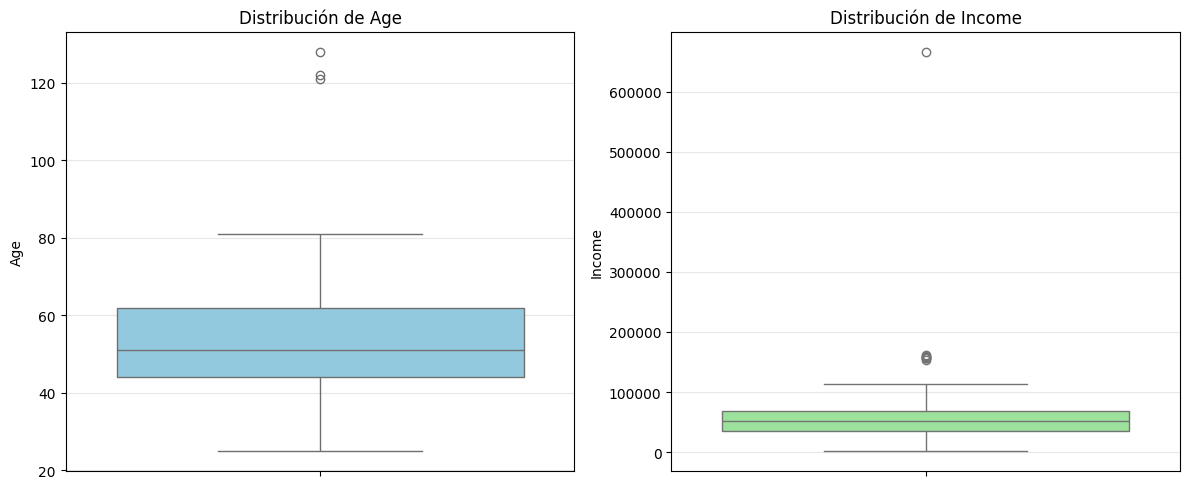

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))


sns.boxplot(y=data['Age'], ax=axes[0], color='skyblue')
axes[0].set_title("Distribución de Age")
axes[0].set_ylabel("Age")


sns.boxplot(y=data['Income'], ax=axes[1], color='lightgreen')
axes[1].set_title("Distribución de Income")
axes[1].set_ylabel("Income")

for ax in axes:
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

En las gráficas anteriores se observa la presencia de valores atípicos en las variables Age e Income.

Dado que la mayoría de los valores de Age no supera los 80 años, se decide establecer un límite superior de 90 años.

De manera similar, para la variable Income se fija un límite de 500 000, ya que todos los valores se encuentran por debajo de este umbral, excepto un caso que supera los 600 000.

In [120]:
data  = data[data['Age'] <=90]
data = data[data['Income'] <= 500000]

### Procesamiento de datos

Se identifican las columnas categóricas y se transforman en variables numéricas para poder entrenar los modelos.

In [121]:
print(f'Variables categoricas: {data.select_dtypes(include="object").columns}')

Variables categoricas: Index(['Education', 'Living_With'], dtype='object')


In [122]:
data['Living_With'] = (data['Living_With'] == 'Partner').astype(int)

education_order = {
    'Basic': 0,
    'Graduation': 1,
    'Postgraduate': 2
}

data['Education'] = data['Education'].map(education_order)

Se realiza una copia del dataset para eliminar aquellas variables que no son relevantes para el proceso de clustering.

In [123]:
final_dataset = data.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
final_dataset = final_dataset.drop(cols_del, axis=1)

### Escalamiento de variables

In [124]:
scaled_dataset = StandardScaler().fit_transform(final_dataset)

## __Reduccion de dimensionalidad con SOM__

### Definición y entrenamiento del SOM

- Define una malla SOM de 15×15 neuronas

- Cada neurona representa un prototipo del espacio original (Preserva topología)

In [125]:
som_x = 15
som_y = 15

som = MiniSom(
    x=som_x,
    y=som_y,
    input_len=scaled_dataset.shape[1],
    sigma=1.0,
    learning_rate=0.3,
    random_seed=7
)

som.random_weights_init(scaled_dataset)
som.train_random(scaled_dataset, 120000, verbose=True)

 [ 120000 / 120000 ] 100% - 0:00:00 left 
 quantization error: 1.8091555721963763


### Construcción del grafo SOM

- Convierte el SOM en un grafo ponderado

- Cada nodo = una neurona SOM

- Cada arista = distancia euclidiana entre neuronas vecinas

In [126]:
som_weights = som.get_weights()
G = nx.Graph()

som_x, som_y, _ = som_weights.shape

for i in range(som_x):
    for j in range(som_y):

        node_id = (i, j)
        G.add_node(node_id)

        for di, dj in [(-1,0),(1,0),(0,-1),(0,1)]:
            ni, nj = i + di, j + dj
            if 0 <= ni < som_x and 0 <= nj < som_y:
                dist = np.linalg.norm(
                    som_weights[i, j] - som_weights[ni, nj]
                )
                G.add_edge(node_id, (ni, nj), weight=dist)

### Cálculo de BMUs y frecuencia

- Para cada dato encuentra su Best Matching Unit (BMU)

- Cuenta cuántos datos caen en cada nodo

In [127]:
bmu_train = [tuple(som.winner(x)) for x in scaled_dataset]

for node in G.nodes():
    G.nodes[node]['bmu_count'] = bmu_train.count(node)

### Visualización del SOM como grafo

- Tamaño del nodo: cantidad de clientes

- Color: densidad

- Aristas: similitud entre neuronas

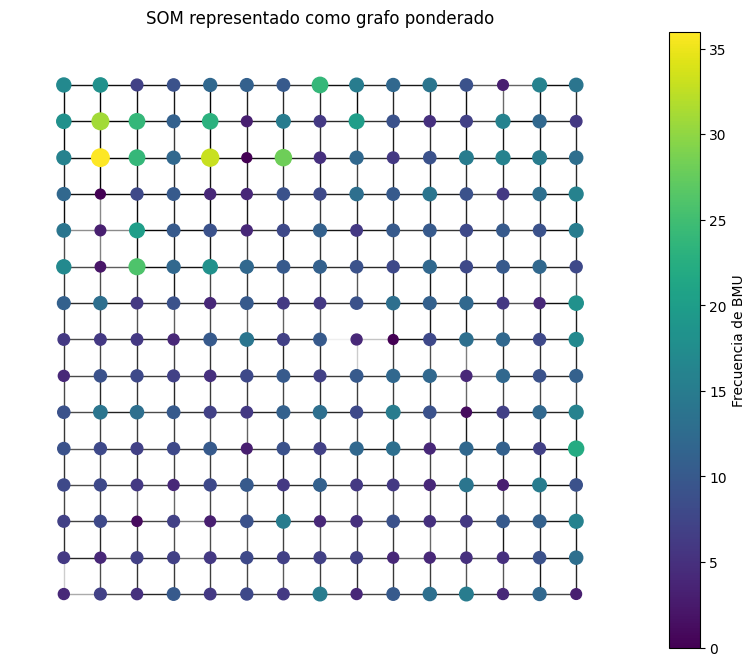

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = {(i, j): (j, -i) for i, j in G.nodes()}

node_colors = [G.nodes[n]['bmu_count'] for n in G.nodes()]
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

nx.draw(
    G, pos,
    node_size=[50 + G.nodes[n]['bmu_count']*3 for n in G.nodes()],
    node_color=node_colors,
    cmap=plt.cm.viridis,
    edge_color=edge_weights,
    edge_cmap=plt.cm.gray,
    with_labels=False,
    ax=ax
)

norm = mpl.colors.Normalize(
    vmin=min(node_colors),
    vmax=max(node_colors)
)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax).set_label("Frecuencia de BMU")

ax.set_title("SOM representado como grafo ponderado")
plt.show()

### Preparación de nodos SOM para KMeans

- Convierte la grilla SOM en una matriz
- Cada nodo es ahora un punto para clustering

In [129]:
node_vectors = som_weights.reshape(-1, scaled_dataset.shape[1])

### Método del codo sobre nodos SOM

- Determina cuántos clusters tiene el SOM

- Reduce ruido respecto a aplicar KMeans directamente al dataset original

In [130]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=7, n_init=10)
    kmeans.fit(node_vectors)
    inertia.append(kmeans.inertia_)

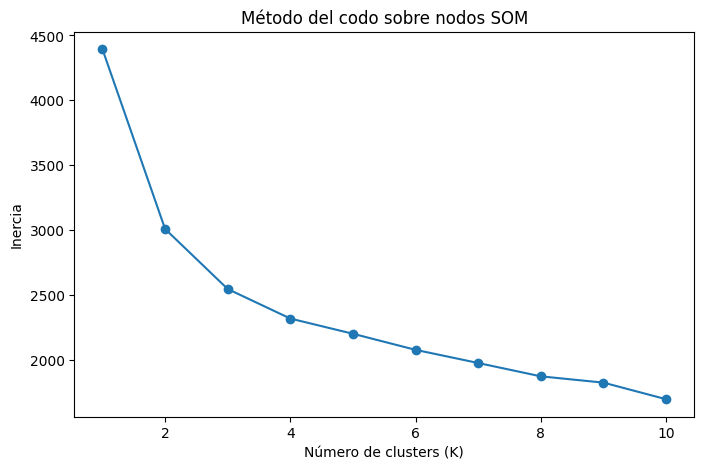

In [131]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo sobre nodos SOM")
plt.show()

## __KMeans final sobre nodos SOM para hacer el Clustering__

- Asigna cada neurona SOM a un cluster

In [132]:
kmeans = KMeans(n_clusters=4, random_state=7, n_init=10)
node_clusters = kmeans.fit_predict(node_vectors)

# Asigna el cluster a cada nodo en el grafo
for idx, node in enumerate(G.nodes()):
    G.nodes[node]['cluster'] = node_clusters[idx]

### Visualización de clusters SOM

- Muestra visualmente los segmentos finales

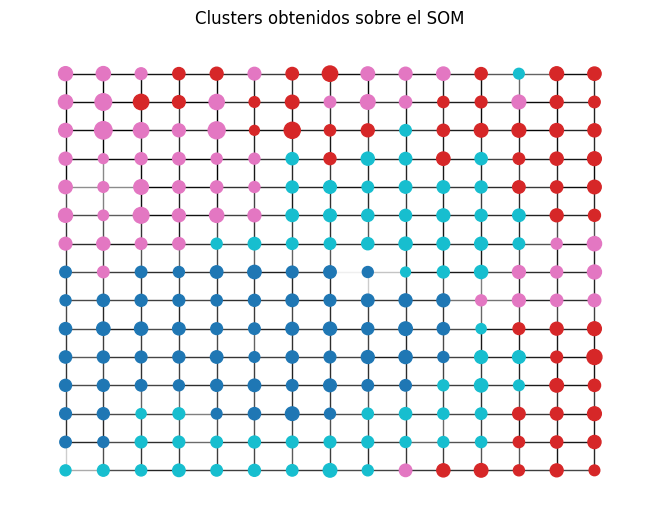

In [133]:
cluster_colors = [G.nodes[n]['cluster'] for n in G.nodes()]

nx.draw(
    G, pos,
    node_size=[50 + G.nodes[n]['bmu_count']*3 for n in G.nodes()],
    node_color=cluster_colors,
    cmap=plt.cm.tab10,
    edge_color=edge_weights,
    edge_cmap=plt.cm.gray,
    with_labels=False
)
plt.title("Clusters obtenidos sobre el SOM")
plt.show()

### Asignación de clusters a cada cliente

- Cada cliente hereda el cluster de su BMU

- Dataset listo para análisis de segmentos

In [134]:
data_clusters = []

for bmu in bmu_train:
    data_clusters.append(G.nodes[bmu]['cluster'])

data['Clusters'] = data_clusters

In [135]:
data['Clusters'].unique()

array([0, 1, 2, 3])

## __Analisis de los Clusters__

### Distribución de clientes por cluster

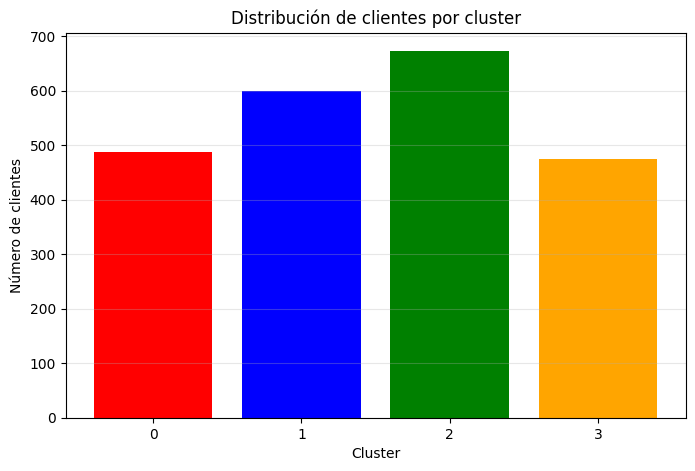

In [136]:
cluster_counts = data['Clusters'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'blue', 'green', 'orange'])

plt.xlabel("Cluster")
plt.ylabel("Número de clientes")
plt.title("Distribución de clientes por cluster")
plt.xticks(cluster_counts.index)
plt.grid(axis='y', alpha=0.3)

plt.show()

### Income vs Total_Spent

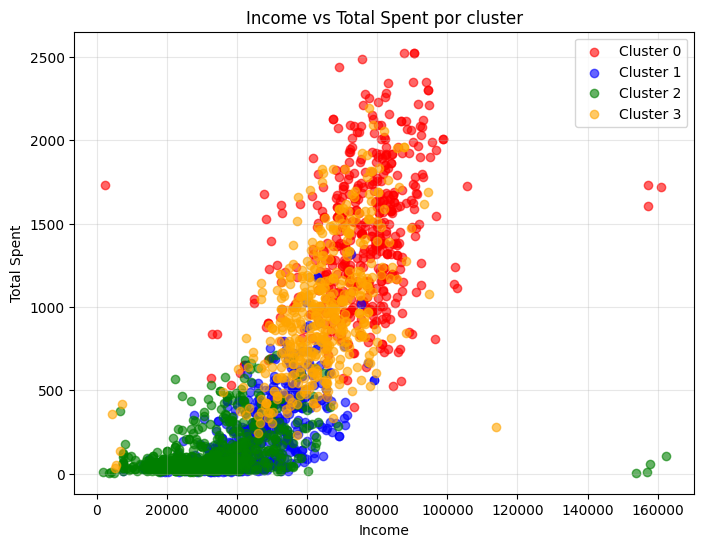

In [137]:
plt.figure(figsize=(8,6))

colors = ['red', 'blue', 'green', 'orange']

for cluster in sorted(data['Clusters'].unique()):
    subset = data[data['Clusters'] == cluster]
    plt.scatter(subset['Income'], subset['Total_Spent'], label=f'Cluster {cluster}', alpha=0.6, color=colors[cluster])

plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.title("Income vs Total Spent por cluster")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

### Número de hijos por cluster

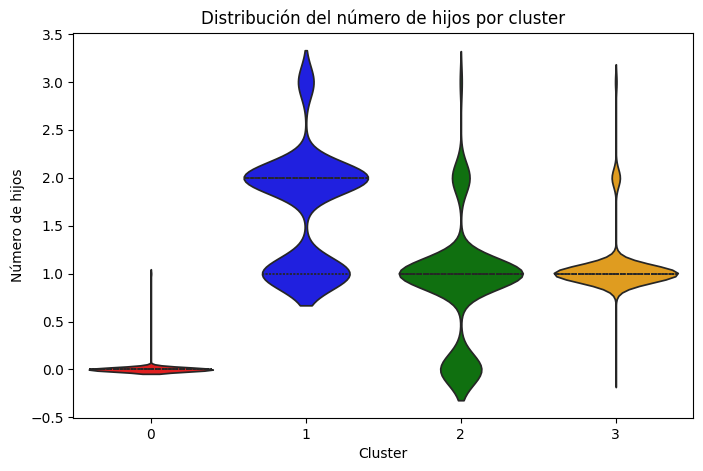

In [138]:
plt.figure(figsize=(8,5))

sns.violinplot(x='Clusters', y='Children', hue='Clusters', data=data, palette=['red', 'blue', 'green', 'orange'], inner='quartile', legend=False)

plt.xlabel("Cluster")
plt.ylabel("Número de hijos")
plt.title("Distribución del número de hijos por cluster")

plt.show()

### Perfil sociodemográfico por cluster

#### Income

<Figure size 800x500 with 0 Axes>

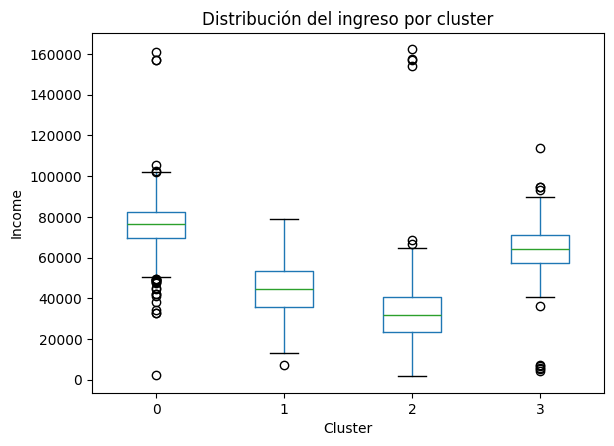

In [139]:
plt.figure(figsize=(8,5))

data.boxplot(column='Income', by='Clusters', grid=False)

plt.xlabel("Cluster")
plt.ylabel("Income")
plt.title("Distribución del ingreso por cluster")
plt.suptitle("")

plt.show()

#### Age

<Figure size 800x500 with 0 Axes>

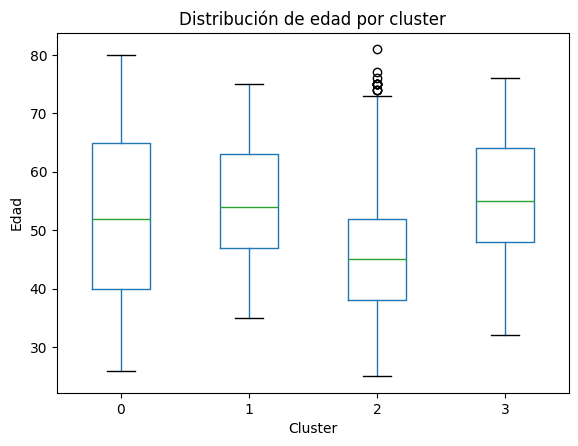

In [140]:
plt.figure(figsize=(8,5))

data.boxplot(column='Age', by='Clusters', grid=False)

plt.xlabel("Cluster")
plt.ylabel("Edad")
plt.title("Distribución de edad por cluster")
plt.suptitle("")

plt.show()

#### Education

In [141]:
education_map = {
    0: 'Basic',
    1: 'Graduation',
    2: 'Postgraduate'
}

data['Education_Label'] = data['Education'].map(education_map)

education_cluster = (data.groupby(['Clusters', 'Education_Label']).size().groupby(level=0).apply(lambda x: x / x.sum() * 100).unstack())

education_cluster.index = education_cluster.index.get_level_values(0)

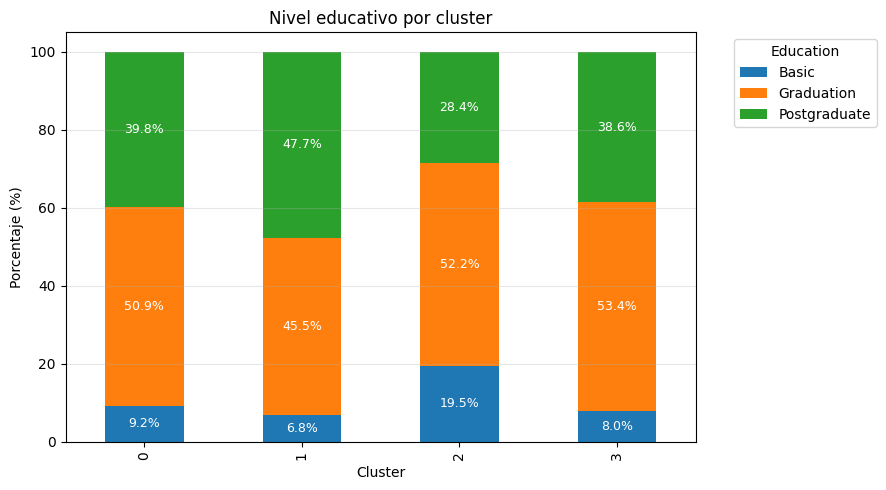

In [142]:
ax = education_cluster.plot(kind='bar', stacked=True, figsize=(9,5))

plt.xlabel("Cluster")
plt.ylabel("Porcentaje (%)")
plt.title("Nivel educativo por cluster")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Mide el añadir porcentajes dentro de los rectángulos
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )

plt.tight_layout()
plt.show()

#### Living_With

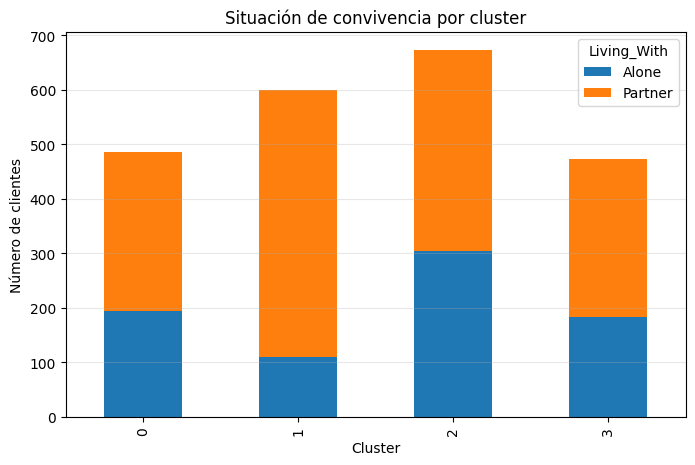

In [143]:
living_map = {
    0: 'Alone',
    1: 'Partner'
}

data['Living_With_Label'] = data['Living_With'].map(living_map)

living_cluster = (data.groupby(['Clusters', 'Living_With_Label']).size().unstack())

living_cluster.plot(kind='bar', stacked=True, figsize=(8,5))

plt.xlabel("Cluster")
plt.ylabel("Número de clientes")
plt.title("Situación de convivencia por cluster")
plt.legend(title="Living_With")
plt.grid(axis='y', alpha=0.3)

plt.show()

#### Family_Size

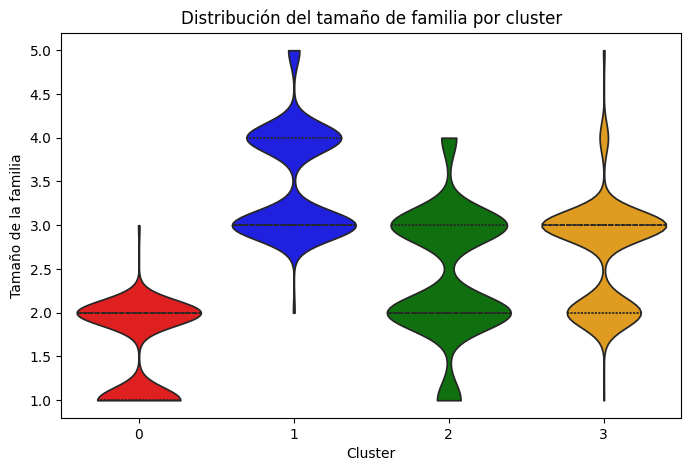

In [144]:
plt.figure(figsize=(8,5))

sns.violinplot(x='Clusters', y='Family_Size', hue='Clusters', data=data, palette=['red', 'blue', 'green', 'orange'],
    inner='quartile'    # quartile  ,  box : muestra boxplot dentro del violín
    ,cut=0              # evita extender más allá de los datos
    ,legend=False
)

plt.xlabel("Cluster")
plt.ylabel("Tamaño de la familia")
plt.title("Distribución del tamaño de familia por cluster")

plt.show()

#### Is_Parent

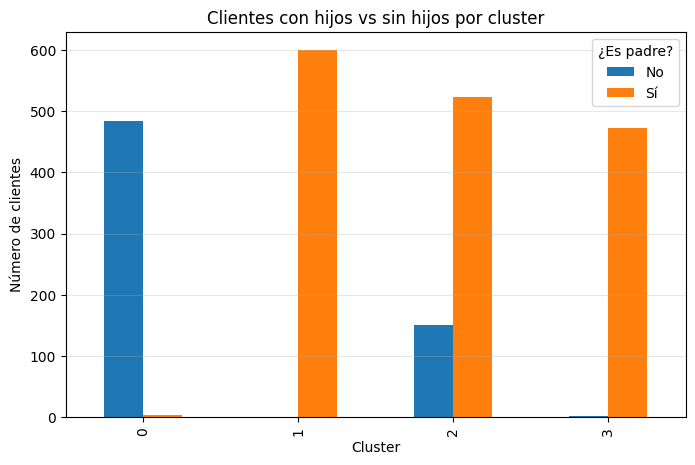

In [145]:
parent_map = {
    0: 'No',
    1: 'Sí'
}

data['Is_Parent_Label'] = data['Is_Parent'].map(parent_map)

parent_cluster = (data.groupby(['Clusters', 'Is_Parent_Label']).size().unstack())

parent_cluster.plot(kind='bar', figsize=(8,5))

plt.xlabel("Cluster")
plt.ylabel("Número de clientes")
plt.title("Clientes con hijos vs sin hijos por cluster")
plt.legend(title="¿Es padre?")
plt.grid(axis='y', alpha=0.3)

plt.show()

### Patrones de consumo por tipo de producto

Cada barra de la grafica representa: Gasto promedio por cliente en ese producto dentro del cluster

In [146]:
product_cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

cluster_product_mean = (data.groupby('Clusters')[product_cols].mean())

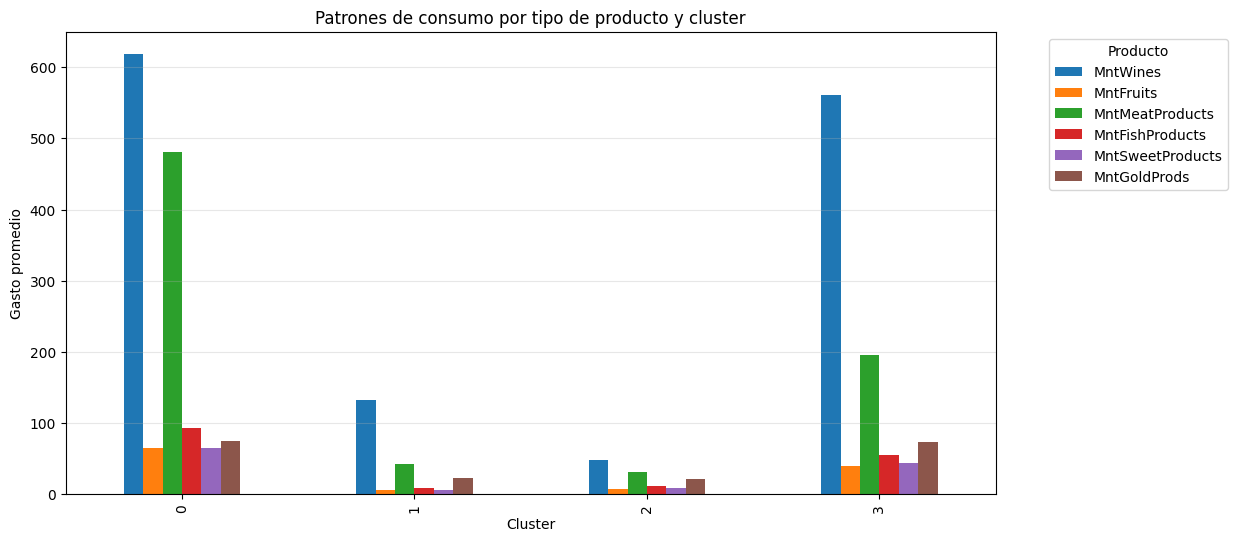

In [147]:
cluster_product_mean.plot(kind='bar', figsize=(12,6))

plt.xlabel("Cluster")
plt.ylabel("Gasto promedio")
plt.title("Patrones de consumo por tipo de producto y cluster")
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.show()

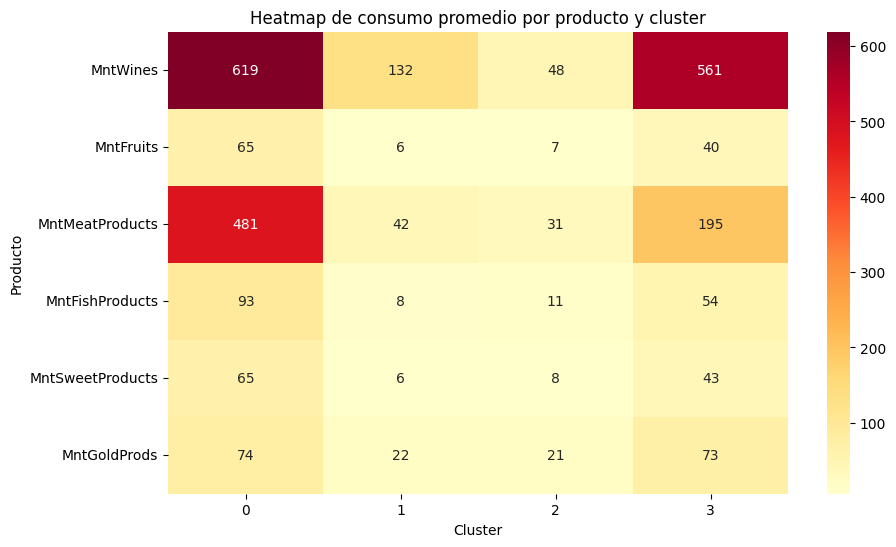

In [148]:
plt.figure(figsize=(10,6))

sns.heatmap(cluster_product_mean.T, annot=True, fmt=".0f", cmap="YlOrRd")

plt.xlabel("Cluster")
plt.ylabel("Producto")
plt.title("Heatmap de consumo promedio por producto y cluster")

plt.show()

### Canales de compra preferidos

In [149]:
channel_cols = [
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

cluster_channel_mean = (data.groupby('Clusters')[channel_cols].mean())

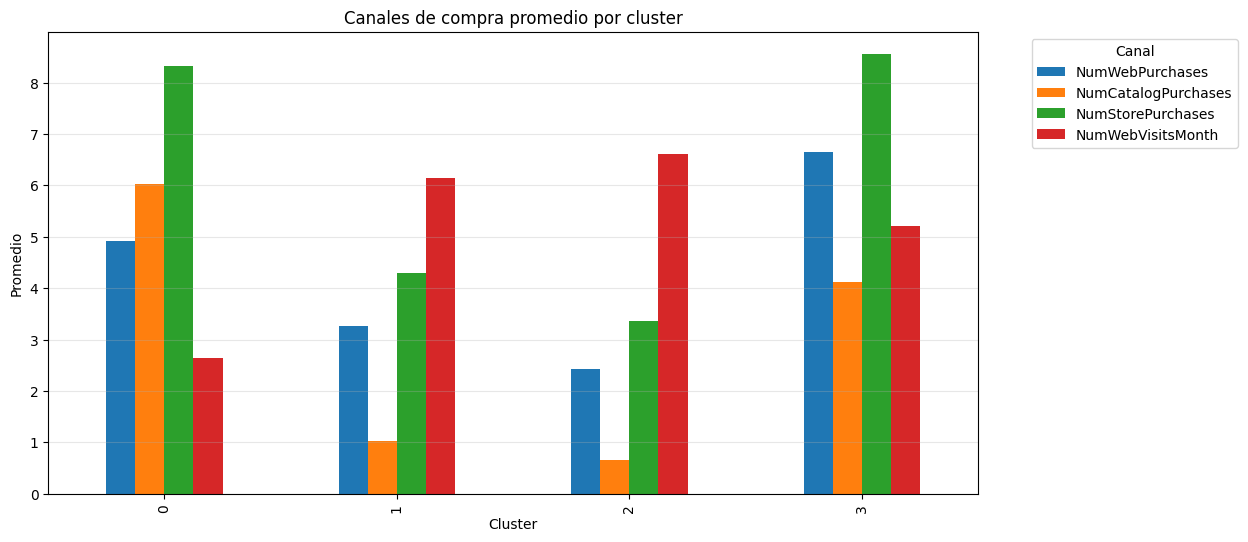

In [150]:
cluster_channel_mean.plot(kind='bar', figsize=(12,6))

plt.xlabel("Cluster")
plt.ylabel("Promedio")
plt.title("Canales de compra promedio por cluster")
plt.legend(title="Canal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.show()

### Aceptación de campañas

In [151]:
campaign_cols = [
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response'
]

campaign_acceptance = (data.groupby('Clusters')[campaign_cols].mean() * 100)

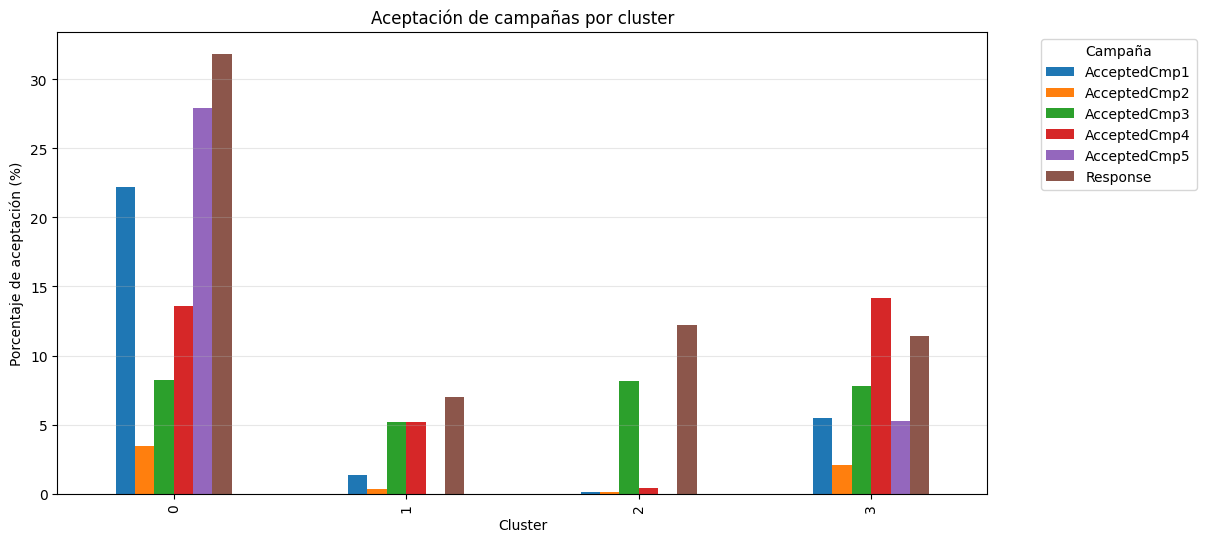

In [152]:
campaign_acceptance.plot(kind='bar',figsize=(12,6))

plt.xlabel("Cluster")
plt.ylabel("Porcentaje de aceptación (%)")
plt.title("Aceptación de campañas por cluster")
plt.legend(title="Campaña", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.show()

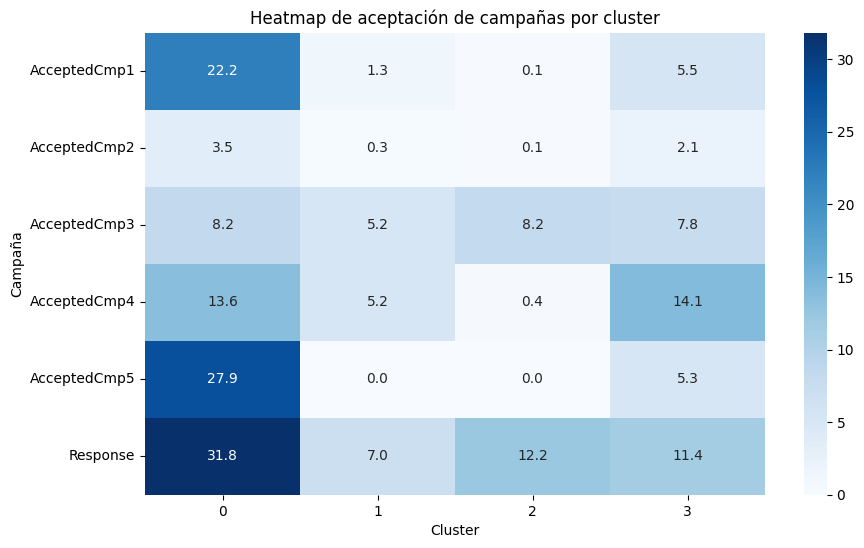

In [153]:
plt.figure(figsize=(10,6))

sns.heatmap(campaign_acceptance.T, annot=True, fmt=".1f", cmap="Blues")

plt.xlabel("Cluster")
plt.ylabel("Campaña")
plt.title("Heatmap de aceptación de campañas por cluster")

plt.show()

## __Insights finales por cluster__

---

### __Cluster 1 – Clientes de alto valor sin hijos__

Este cluster está compuesto principalmente por clientes sin hijos, con un ingreso promedio cercano a los 80,000 y una edad entre 40 y 65 años. Aproximadamente el 50% cuenta con nivel educativo “Graduation” y la mayoría vive en pareja.

Debido a la ausencia de hijos, el tamaño del hogar es reducido, generalmente entre 1 y 2 miembros. En cuanto al consumo, destacan por un alto gasto en vinos (MntWines) y productos de pescado (MntFishProducts), con gastos promedio superiores a 600 en vinos y 400 en pescado.

Sus canales de compra preferidos, en orden descendente, son:
- Compras en tienda física
- Compras por catálogo
- Compras web
- Visitas al sitio web

Respecto a la respuesta a campañas, este cluster muestra mayor aceptación en:
Response, seguida de AcceptedCmp5, AcceptedCmp1, AcceptedCmp4, AcceptedCmp3 y AcceptedCmp2.

---

### __Cluster 2 – Familias con alto nivel educativo y gasto moderado__

La mayoría de los clientes en este cluster tiene dos hijos, aunque una parte presenta solo un hijo. El ingreso promedio ronda los 45,000 y la edad se encuentra entre 48 y 62 años.

Casi el 50% tiene nivel educativo “Postgraduate”, siendo el cluster con mayor nivel educativo. La mayoría vive en pareja y el tamaño familiar suele estar entre 3 y 4 miembros.

Aunque el producto más consumido es MntWines, el gasto promedio es bajo, apenas superior a 100, lo que indica un consumo más moderado.

Sus canales de compra preferidos son:
- Visitas al sitio web
- Compras en tienda física
- Compras web
- Compras por catálogo

En cuanto a campañas, la aceptación promedio sigue el orden:
Response, AcceptedCmp3, AcceptedCmp4, AcceptedCmp1 y AcceptedCmp2.

---

### __Cluster 3 – Clientes jóvenes con bajo ingreso y bajo consumo__

Este cluster está formado principalmente por clientes con un hijo, con un ingreso promedio cercano a los 30,000 y edades entre 38 y 52 años. Aproximadamente el 50% cuenta con nivel educativo “Graduation”.

La situación de convivencia está dividida: cerca de la mitad vive en pareja y la otra mitad vive sola. El tamaño familiar se concentra entre 3 y 4 miembros.

El producto más consumido es MntWines, pero con un gasto promedio bajo, cercano a 50, lo que refleja una capacidad de consumo limitada.

Sus canales de compra preferidos son:
- Visitas al sitio web
- Compras en tienda física
- Compras web
- Compras por catálogo

La aceptación de campañas sigue el orden:
Response, AcceptedCmp3, AcceptedCmp4, AcceptedCmp1 y AcceptedCmp2.

---

### __Cluster 4 – Familias pequeñas con consumo selectivo__

Este cluster está compuesto mayoritariamente por clientes con un hijo, con un ingreso promedio alrededor de 60,000 y edades entre 48 y 64 años. Aproximadamente el 50% tiene nivel educativo “Graduation” y la mayoría vive en pareja.

El tamaño familiar se ubica entre 2 y 3 miembros. En consumo, destacan MntWines y MntFishProducts, con gastos promedio superiores a 500 en vinos y cercanos a 200 en pescado.

Los canales de compra preferidos, en orden descendente, son:
- Compras en tienda física
- Compras web
- Visitas al sitio web
- Compras por catálogo

En cuanto a campañas, muestran mayor aceptación en:
AcceptedCmp3, seguida de Response, AcceptedCmp1, AcceptedCmp5 y AcceptedCmp2.

---